###### !pip install imblearn

In [1]:
!pip install imblearn
!pip install ultimate==2.1.2
!pip install scikit-learn-intelex

In [2]:
import imblearn
print(imblearn.__version__)
from itertools import *
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import pickle

0.9.0


In [3]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Data Reading

In [4]:
#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")
#df = pd.concat((pd.read_csv(f) for f in all_files))
#df = pd.read_csv('CICIDS_2017_NoDuplicates.xlsx')
df = pd.read_csv('df.csv')

In [5]:
print(df.columns[:50])

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [6]:
print(df.columns[50:])

Index(['ECE_Flag_Count', 'Down_Up_Ratio', 'Average_Packet_Size',
       'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Fwd_Header_Length.1',
       'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate',
       'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate',
       'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets',
       'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min', 'Label'],
      dtype='object')


In [7]:
df.shape

(2403694, 79)

In [8]:
df

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,64601,7801337,1,6,6,36,6,6,6.0,0.000000,...,20,33053.0,0.0,33053,33053,7768284.0,0.0,7768284,7768284,BENIGN
1,53,227,2,2,84,310,42,42,42.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,45402398,2,2,90,334,46,44,45.0,1.414214,...,20,30801.0,0.0,30801,30801,45300000.0,0.0,45300000,45300000,BENIGN
3,53,122059,1,1,45,94,45,45,45.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,65157,49,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403689,53,721,2,2,88,200,44,44,44.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2403690,443,87813,3,1,18,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2403691,1935,104,2,2,4,12,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2403692,53,91481,1,1,38,120,38,38,38.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [10]:
df.columns = col_names

In [11]:
df = df.sample(n=100000) #keep incrementing data to get more accurate results 
#df = df.sample(n=2000)

In [12]:
data_transpose = df.T
print(data_transpose)
data_transpose.duplicated().sum()

                            1721313 1632905 385047      1271726    744085   \
Destination_Port                 53      53      21          80         80   
Flow_Duration                 59851   23613      37    99174728    8439766   
Total_Fwd_Packets                 4       2       2           6          4   
Total_Backward_Packets            2       2       2           7          0   
Total_Length_of_Fwd_Packets     132      76       4         312         24   
...                             ...     ...     ...         ...        ...   
Idle_Mean                       0.0     0.0     0.0  99100000.0  8439762.0   
Idle_Std                        0.0     0.0     0.0         0.0        0.0   
Idle_Max                          0       0       0    99100000    8439762   
Idle_Min                          0       0       0    99100000    8439762   
Label                        BENIGN  BENIGN  BENIGN    DoS Hulk       DDoS   

                            1159756 242355     1470291 987913  

15

In [13]:
data_transpose.duplicated(subset=None, keep='first')
data_transpose.duplicated().sum()/len(df)

0.00015

In [14]:
# making a bool series
bool_series = data_transpose.duplicated()
# displaying data
data_transpose.head()
# display data
data_transpose[bool_series]

,1721313,1632905,385047,1271726,744085,1159756,242355,1470291,987913,853145,...,1082308,68036,72485,1610351,1466109,788641,2339583,56948,1808150,2231102
Bwd_URG_Flags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SYN_Flag_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CWE_Flag_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ECE_Flag_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Avg_Fwd_Segment_Size,33.0,38.0,2.0,52.0,6.0,3.0,36.0,142.571429,262.5,40.0,...,7.0,0.0,71.3,2.0,6.0,116.833333,30.0,0.0,7.0,1316.0
Fwd_Header_Length,80,64,48,164,80,52,64,152,172,40,...,172,20,332,24,40,252,40,20,172,64
Fwd_Avg_Bytes_Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fwd_Avg_Packets_Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fwd_Avg_Bulk_Rate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bwd_Avg_Bytes_Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data_transpose.shape

(79, 100000)

In [16]:
data_transpose = data_transpose[~bool_series]

In [17]:
df = data_transpose.T

In [18]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length',
       'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std',
       'Packet_Length_Variance', 'FIN_Flag_Count', 'RST_Flag_Count',
       'PSH_Flag_C

In [19]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
1721313,53,59851,4,2,132,190,33,33,33.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1632905,53,23613,2,2,76,160,38,38,38.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
385047,21,37,2,2,4,12,2,2,2.0,0.0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1271726,80,99174728,6,7,312,11595,294,0,52.0,118.591737,...,20,12992.0,0.0,12992,12992,99100000.0,0.0,99100000,99100000,DoS Hulk
744085,80,8439766,4,0,24,0,6,6,6.0,0.0,...,20,4.0,0.0,4,4,8439762.0,0.0,8439762,8439762,DDoS


In [20]:
def RForest_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=0.02), y.sample(frac=0.02),test_size=0.2,random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    y_test_predict = clf.predict(X_test.values.reshape(-1,1))
    clf.score(X_test.values.reshape(-1,1),y_test)
    print(classification_report(y_test,y_test_predict))

# Data Cleaning

In [21]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.isnull().any().any()

False

In [22]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
1721313,53,59851,4,2,132,190,33,33,33.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1632905,53,23613,2,2,76,160,38,38,38.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
385047,21,37,2,2,4,12,2,2,2.0,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1271726,80,99174728,6,7,312,11595,294,0,52.0,118.591737,...,20,12992.0,0.0,12992,12992,99100000.0,0.0,99100000,99100000,DoS Hulk
744085,80,8439766,4,0,24,0,6,6,6.0,0.000000,...,20,4.0,0.0,4,4,8439762.0,0.0,8439762,8439762,DDoS


In [23]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length',
       'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std',
       'Packet_Length_Variance', 'FIN_Flag_Count', 'RST_Flag_Count',
       'PSH_Flag_C

In [24]:
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'SQL'

In [25]:
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [26]:
df.duplicated(subset=None, keep='first')

1721313    False
1632905    False
385047     False
1271726    False
744085     False
           ...  
788641     False
2339583    False
56948      False
1808150    False
2231102    False
Length: 100000, dtype: bool

In [27]:
df.duplicated().sum()/len(df)

0.03443

In [28]:
# making a bool series
bool_series = df.duplicated() 
# displaying data
df.head()
# display data
df[bool_series]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack
1467525,443,4,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
535726,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
1734483,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
1675801,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
2234757,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117280,53,220,2,2,104,220,52,52,52.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
109341,80,1,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
52026,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2124097,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1


In [29]:
df.shape

(100000, 65)

In [30]:
df = df[~bool_series].reset_index(drop=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96557 entries, 0 to 96556
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             96557 non-null  int64  
 1   Flow_Duration                96557 non-null  int64  
 2   Total_Fwd_Packets            96557 non-null  int64  
 3   Total_Backward_Packets       96557 non-null  int64  
 4   Total_Length_of_Fwd_Packets  96557 non-null  int64  
 5   Total_Length_of_Bwd_Packets  96557 non-null  int64  
 6   Fwd_Packet_Length_Max        96557 non-null  int64  
 7   Fwd_Packet_Length_Min        96557 non-null  int64  
 8   Fwd_Packet_Length_Mean       96557 non-null  float64
 9   Fwd_Packet_Length_Std        96557 non-null  float64
 10  Bwd_Packet_Length_Max        96557 non-null  int64  
 11  Bwd_Packet_Length_Min        96557 non-null  int64  
 12  Bwd_Packet_Length_Mean       96557 non-null  float64
 13  Bwd_Packet_Lengt

In [32]:
def explore_unique_values_min(train_data, y_hat):
        
        muestra_fs = train_data
        one_value = []
        list_one_value = []
        list_individual_values = []
        drop_columns= []
        list_min_values = []
        
        for col in muestra_fs.columns:
            col_values = muestra_fs[col].value_counts()
            print('=======================', col, '=======================')
            print('Unique values {} percentage {} % '.format(muestra_fs[col].nunique(), (muestra_fs[col].nunique()/len(muestra_fs))*100))
            if (muestra_fs[col].nunique() <= 300):
                print(muestra_fs[col].unique() )
                print('Count_by_unique: ')
                print(muestra_fs[col].value_counts())
            else:
                print(muestra_fs[col].unique()[:5], '...')
            
            if(col == y_hat):            
                for i in range(0, len(muestra_fs[col].value_counts())):
                    print(col_values.index[i], col_values.iloc[i], (col_values.iloc[i] / len(muestra_fs[col]))*100)
                    if (col_values.iloc[i] < 21) | (((col_values.iloc[i] / len(muestra_fs[col]))*100)<0.01) :
                        print('unique labels to drop', col_values.index[i])
                        list_min_values.append(col_values.index[i])

            if (muestra_fs[col].nunique() == 1):
                one_value.append(col)
                one_value.append(muestra_fs[col].unique())

                drop_columns.append(col)
            if  ((muestra_fs[col].nunique()/len(muestra_fs))*100) == 100:
                list_individual_values.append(col)
                drop_columns.append(col)


        print("The columns with one value are: \n",one_value )      
        print("The columns with individual values are: \n",list_individual_values )   
        print("The total drop columns  are: \n", drop_columns )    
        
       
        return drop_columns, list_min_values

In [33]:
drop_col, list_min_drop = explore_unique_values_min(df, 'Label')

======================= Destination_Port =======================
Unique values 12753 percentage 13.207742576923476 % 
[   53    21    80 63603   443] ...
======================= Flow_Duration =======================
Unique values 53926 percentage 55.8488768292304 % 
[   59851    23613       37 99174728  8439766] ...
======================= Total_Fwd_Packets =======================
Unique values 327 percentage 0.3386600660749609 % 
[4 2 6 7 8] ...
======================= Total_Backward_Packets =======================
Unique values 395 percentage 0.409084789295442 % 
[2 7 0 8 1] ...
======================= Total_Length_of_Fwd_Packets =======================
Unique values 4241 percentage 4.392224282030304 % 
[132  76   4 312  24] ...
======================= Total_Length_of_Bwd_Packets =======================
Unique values 8067 percentage 8.354650620876788 % 
[  190   160    12 11595     0] ...
======================= Fwd_Packet_Length_Max =======================
Unique values 2111 percent

======================= ACK_Flag_Count =======================
Unique values 2 percentage 0.0020713153888376815 % 
[0 1]
Count_by_unique: 
0    66971
1    29586
Name: ACK_Flag_Count, dtype: int64
======================= URG_Flag_Count =======================
Unique values 2 percentage 0.0020713153888376815 % 
[0 1]
Count_by_unique: 
0    87069
1     9488
Name: URG_Flag_Count, dtype: int64
======================= Down_Up_Ratio =======================
Unique values 11 percentage 0.011392234638607248 % 
[  0   1   2   5   4   3   6   7 108  25 156]
Count_by_unique: 
1      59673
0      34235
2       1708
5        404
6        226
3        197
4         90
7         21
25         1
156        1
108        1
Name: Down_Up_Ratio, dtype: int64
======================= Average_Packet_Size =======================
Unique values 16211 percentage 16.789046884223826 % 
[ 59.16666667  68.5          4.5        916.3846154    7.5       ] ...
======================= Avg_Bwd_Segment_Size ================

In [34]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags'] ['Infiltration', 'SQL']


In [35]:
df.shape

(96557, 65)

In [36]:
df.drop(drop_col, axis=1, inplace=True)

In [37]:
for drop_row in list_min_drop:
    df = df[df.Label != drop_row]

In [38]:
df.shape

(96553, 64)

# Preprocessing

In [39]:
def preprocessing_model(df):
    df.reset_index(drop = True, inplace = True)
    X = df.drop(['Label', 'Attack'],  axis=1)
    y = df['Label']
    y.unique()
    label_encoder = preprocessing.LabelEncoder()
    #df[cat] = le.fit_transform(df[cat].astype(str)) # Example
    y = label_encoder.fit_transform(y.astype(str))
    print(y)
    print(drop_col, list_min_drop)
    X.shape
    y.shape
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    y_aux = y.copy()
    y_aux['count_'] = 1
    y_aux.groupby(0).count()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
    sss.get_n_splits(X, y)
    print(sss)
    for train_index, test_index in sss.split(X, y):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]
    y_train_aux = y_train.copy()
    y_test_aux = y_test.copy()
    y_train_aux['count_'] = 1
    y_test_aux['count_'] = 1
    y_train_aux.groupby(0).count()
    y_test_aux.groupby(0).count()
    print(y_train, y_test)
    print(X_train.head())   
    SS = MinMaxScaler()
    x_train_scaled = SS.fit_transform(X_train)
    x_test_scaled = SS.fit_transform(X_test)
    X = SS.fit_transform(X)
    print(X_train.shape)
    print(X_test.shape)
    print(x_test_scaled.shape)
    pca =PCA(n_components=12) 
    x_train_pca=pca.fit_transform(x_train_scaled)
    x_test_pca=pca.fit_transform(x_test_scaled)
    X = pca.fit_transform(X)
    print(x_train_pca.shape)
    print(x_test_pca.shape)   
    return x_train_pca, x_test_pca, y_train, y_test, X, y

In [40]:
x_train_preprocess_model, x_test_preprocess_model, y_train, y_test, X, y = preprocessing_model(df)

[0 0 0 ... 0 3 0]
['Bwd_PSH_Flags'] ['Infiltration', 'SQL']
Counter({0: 1})
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)
TRAIN: [294567 664518 284415 ...  70896 209014 261378] TEST: [481780  59716 708595 ... 206059 258370 550912]
TRAIN: [535410 200821 910137 ... 622087 182694 559000] TEST: [281357 418035 605560 ... 127450 562418 324855]
TRAIN: [241131 807702 873107 ...  53812 421131 760761] TEST: [130964 245645 292087 ... 902475  25604 190147]
TRAIN: [528960 554765 128640 ... 841412 781074 720168] TEST: [343097 254582 183178 ... 172256 193969 193759]
TRAIN: [ 92998 517970 159966 ... 232925 863904 546099] TEST: [576113  62771 650229 ... 216125 941897 913303]
         0
92998    0
517970   6
159966   1
431589   5
397028   4
...     ..
475026   5
379899   4
232925   2
863904  10
546099   6

[803148 rows x 1 columns]          0
576113   7
62771    3
650229   8
756771   9
431090   5
...     ..
409224   5
259487   3
216125   2
941897  11
913

In [41]:
X

array([[-2.34386925e-01, -4.40729429e-01,  2.85041548e-03, ...,
         3.65834653e-02, -3.04202175e-04, -1.56071781e-01],
       [-2.35291189e-01, -4.41537250e-01,  7.92291723e-04, ...,
         3.67715297e-02, -8.09600260e-04, -1.56365370e-01],
       [-5.88256765e-01,  1.06459299e-01, -1.25431530e-01, ...,
        -1.20927776e-02, -8.47372699e-02, -1.99778950e-01],
       ...,
       [-5.99337021e-01,  2.40778392e-01, -2.14905056e-01, ...,
         8.59662925e-03,  9.40348051e-02, -3.71488513e-02],
       [-5.91785647e-01,  2.44266911e-01, -2.17637436e-01, ...,
         1.18794605e-02,  9.37648609e-02, -3.80285943e-02],
       [-5.98130778e-01,  2.41335680e-01, -2.15341325e-01, ...,
         9.12064404e-03,  9.39916877e-02, -3.72898753e-02]])

# Set_Model 

In [42]:
def set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test):
    model_classifier = MLPClassifier(random_state=1, max_iter=300)
    model_classifier.fit(x_train_preprocess_model,y_train)
    score_model=model_classifier.score(x_test_preprocess_model,y_test)
    score_model=round(score_model,4)*100
    print('Model Score: ', score_model)
    return model_classifier

In [43]:
model_classifier = set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test)

C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24


# Serialization

In [44]:
file = open("pca_mlp_model.pkl", 'wb')
pickle.dump(model_classifier, file)
file.close()

In [45]:
model = pickle.load(open('pca_mlp_model.pkl','rb'))

In [46]:
model.score(x_test_preprocess_model, y_test)

0.2223915558942229

# Evaluate_Model

In [47]:
y_pred_pcamlp=model_classifier.predict(x_test_preprocess_model)

In [48]:
y_pred_pcamlp

array([10,  0,  9, ...,  2,  2,  2])

In [49]:
print(classification_report(y_test,y_pred_pcamlp))

              precision    recall  f1-score   support

           0       0.09      0.43      0.14     11811
           1       0.12      0.00      0.01     11811
           2       0.44      0.77      0.56     11811
           3       0.02      0.00      0.00     11811
           4       0.82      0.17      0.28     11811
           5       0.44      0.35      0.39     11811
           6       0.30      0.05      0.08     11811
           7       0.05      0.04      0.04     11811
           8       0.46      0.57      0.51     11811
           9       0.00      0.00      0.00     11811
          10       0.28      0.28      0.28     11811
          11       0.00      0.00      0.00     11811

    accuracy                           0.22    141732
   macro avg       0.25      0.22      0.19    141732
weighted avg       0.25      0.22      0.19    141732



C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
print('Confusion Matrix PCA/MLP:')
_pca_mlp = confusion_matrix(y_test, y_pred_pcamlp)
print(_pca_mlp)

Confusion Matrix PCA/MLP:
[[ 5060     7   202    13    45   421   175  2714  2564   310   300     0]
 [ 7145    44     0     0     0     7   331  1255  3022     7     0     0]
 [ 1359     0  9150     0     0     0     0   168     0    15  1119     0]
 [10022    82     0     4     0  1700     0     3     0     0     0     0]
 [ 7025     0     0     0  2028  1925   416     0     0    19   398     0]
 [ 6985     0     0   198   382  4183    19    37     0     5     2     0]
 [ 1386   197    25     0     0     3   559  2348     1  6825   467     0]
 [ 5448    24   685     0     0    20   367   415     4  1160  3688     0]
 [   53     0     0     0     0     0     0     0  6730  5028     0     0]
 [ 5408     0    48    14     7  1313     2     2  2333     0  2684     0]
 [ 8464     0     0     0     0     0     0     0     0     0  3347     0]
 [  258     0 10742     0     0     0     0   703     4   104     0     0]]


Text(30.5, 0.5, 'True')

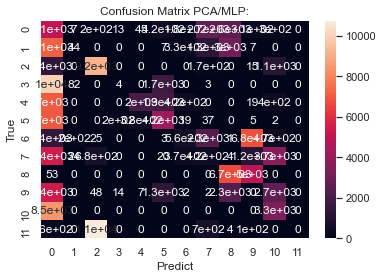

In [51]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(_pca_mlp,annot=True,ax=ax)

ax.set_title('Confusion Matrix PCA/MLP:') 
ax.set_xlabel('Predict') 
ax.set_ylabel('True') 

In [52]:
y_pred_pcamlp_vectorized=model_classifier.predict_proba(x_test_preprocess_model)#.argmax(axis=1)

In [53]:
y_test_vectorized = pd.get_dummies(y_test.astype(str), prefix='Label')

In [54]:
if y_test_vectorized.shape[1] < 2:    
    y_test_vectorized_aux = y_test_vectorized.copy()
    y_test_vectorized_aux['count_'] = 1
    y_test_vectorized_aux.groupby(0).count()

In [55]:
y_test_vectorized

,Label_0,Label_1,Label_10,Label_11,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9
576113,0,0,0,0,0,0,0,0,0,1,0,0
62771,0,0,0,0,0,1,0,0,0,0,0,0
650229,0,0,0,0,0,0,0,0,0,0,1,0
756771,0,0,0,0,0,0,0,0,0,0,0,1
431090,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
409224,0,0,0,0,0,0,0,1,0,0,0,0
259487,0,0,0,0,0,1,0,0,0,0,0,0
216125,0,0,0,0,1,0,0,0,0,0,0,0
941897,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
y_pred_pcamlp_vectorized.shape 

(141732, 12)

In [57]:
y_test_vectorized.shape

(141732, 12)

In [58]:
type(y_pred_pcamlp_vectorized)

numpy.ndarray

In [59]:
def ROC_curve_model(n_classes, pred1, y_test_): 
    n_classes = y_test_vectorized.shape[1] 
    pred1 = y_pred_pcamlp_vectorized #          model.predict(x_test)
    y_test_ = y_test_vectorized.values

    t1 = sum(x == 0 for x in pred1 - y_test_) / len(pred1)

    ### MACRO
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], pred1[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    lw = 2
    plt.figure(figsize=(8, 5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'lawngreen', 'crimson', 'darkviolet', 'mediumblue','darkorchid', 'forestgreen', 'darkcyan', 'skyblue', 'navy', 'seagreen', 'maroon'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i])) #0

    plt.plot([0, 1], [0, 1], 'k--', color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess', (.5, .48), color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve- ')
    plt.legend(loc="lower right")
    plt.show()


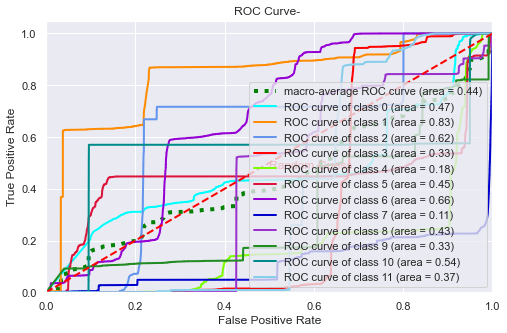

In [60]:
ROC_curve_model(y_test_vectorized.shape[1], y_pred_pcamlp_vectorized, y_test_vectorized.values)

# K-Fold Cross Validation 

In [61]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [62]:
def evaluate_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test, cv, X, y):
	# get the model
	model = set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='recall_macro', cv=cv, n_jobs=-1) 
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [63]:
ideal, _, _ = evaluate_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test, 2, X, y)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,11) # fold = splits
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True)#, random_state=0)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test, cv, X, y)
	# report performance
	print('> folds=%d, recall_macro=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
Ideal: 0.930


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=2, recall_macro=0.934 (0.933,0.935)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=3, recall_macro=0.935 (0.929,0.939)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=4, recall_macro=0.935 (0.931,0.938)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=5, recall_macro=0.936 (0.931,0.941)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=6, recall_macro=0.938 (0.936,0.941)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=7, recall_macro=0.936 (0.933,0.939)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=8, recall_macro=0.940 (0.935,0.942)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=9, recall_macro=0.936 (0.929,0.942)


C:\Users\tokio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score:  22.24
> folds=10, recall_macro=0.937 (0.932,0.943)


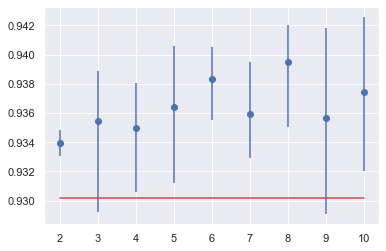

In [64]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()